# Speed visualization on track map

(Example provided by @JSEHV on Github)


In [71]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

First, we define some variables that allow us to conveniently control what
we want to plot.



In [79]:
driver = 'VER'
colormap = mpl.cm.plasma
session_name = "Qualifying"

In [78]:
session = ff1.get_session(2023, "Austria", session_name)
session.load()

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '4', '44', '18', '14', '27', '10', '23', '63', '31', '81', '77', '11', '22', '24', '2', '20', '21']


Next, we load the session and select the desired data.



Now, we create a set of line segments so that we can color them
individually. This creates the points as a N x 1 x 2 array so that we can
stack points  together easily to get the segments. The segments array for
line collection needs to be (numlines) x (points per line) x 2 (for x and y)



After this, we can actually plot the data.



In [81]:
def plot_speed_on_track(session, session_name, driver):

    lap = session.laps.pick_driver(driver).pick_fastest()

    # Get telemetry data
    x = lap.telemetry['X']              # values for x-axis
    y = lap.telemetry['Y']              # values for y-axis
    color = lap.telemetry['Speed']      # value to base color gradient on

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # We create a plot with title and adjust some setting to make it look good.
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    #fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='gray', linestyle='-', linewidth=10, zorder=0)
    #ax.plot(x, y, color='gray', linestyle='-', linewidth=10, zorder=0)


    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


    ax.legend()
    #plt.figure().set_size_inches(50000, 500000, forward=True)
    #fig.set_dpi(1000)
    fig.set_facecolor("black")

    mpl.rc('text', color='white')
    mpl.rc('axes', labelcolor='white')
    mpl.rc('xtick', color='white')
    mpl.rc('ytick', color='white')

    plt.suptitle(f"Speed on track \n "f"{driver} {session.event['EventName']} {session.event.year} {session_name}")


    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


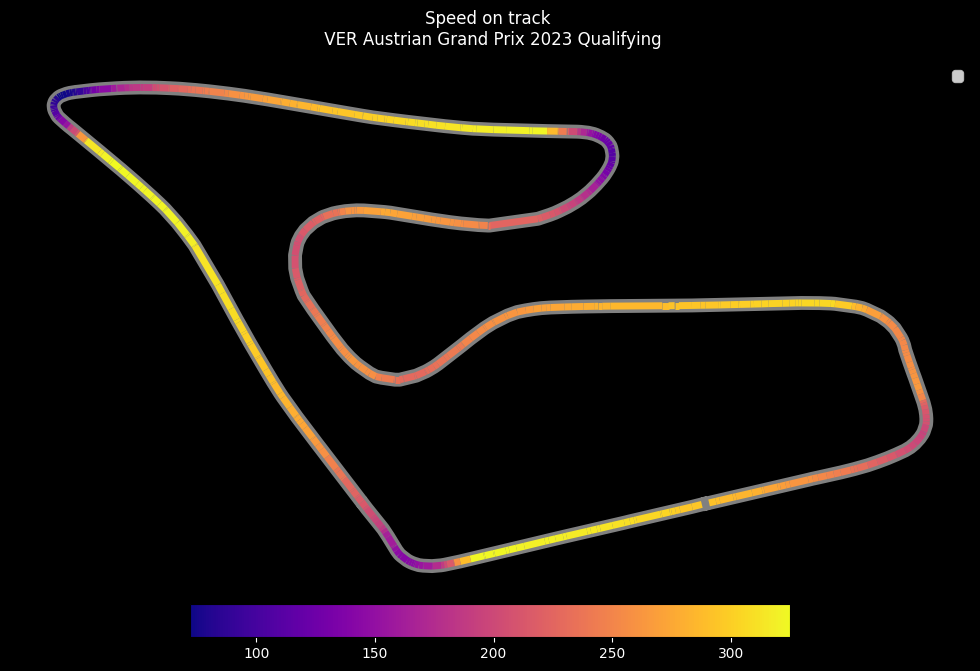

In [82]:
plot_speed_on_track(session, session_name, driver)